## Random Forest and bagging of Boston Dataset

In [10]:
library(MASS)
library(randomForest)
set.seed(42)

df = Boston

In [12]:
head(df)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


#### Train-Test Split

In [22]:
train.index = sample(1:nrow(Boston), 0.7*nrow(Boston))
train = Boston[train.index,]
test = Boston[-train.index,]

cat("train size:", dim(train))
cat("\ntest size:", dim(test))


train size: 354 14
test size: 152 14

### Modeling a regression random forest, with m = p variables (all 13 features) 

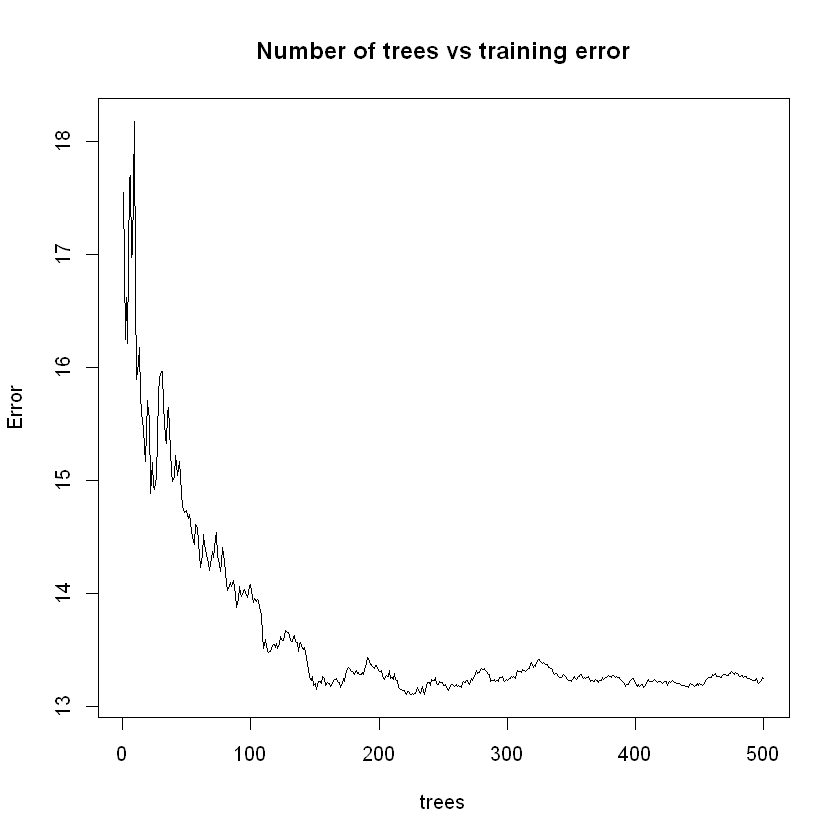

In [25]:
rf.Boston = randomForest(medv~., data = Boston, subset =  train.index 
                         ,mtry = 13, importance = T)

par(mfrow = c(1,1))
plot(rf.Boston,main = "Number of trees vs training error")
        

### Prediction:

Test MSE: 10.51674

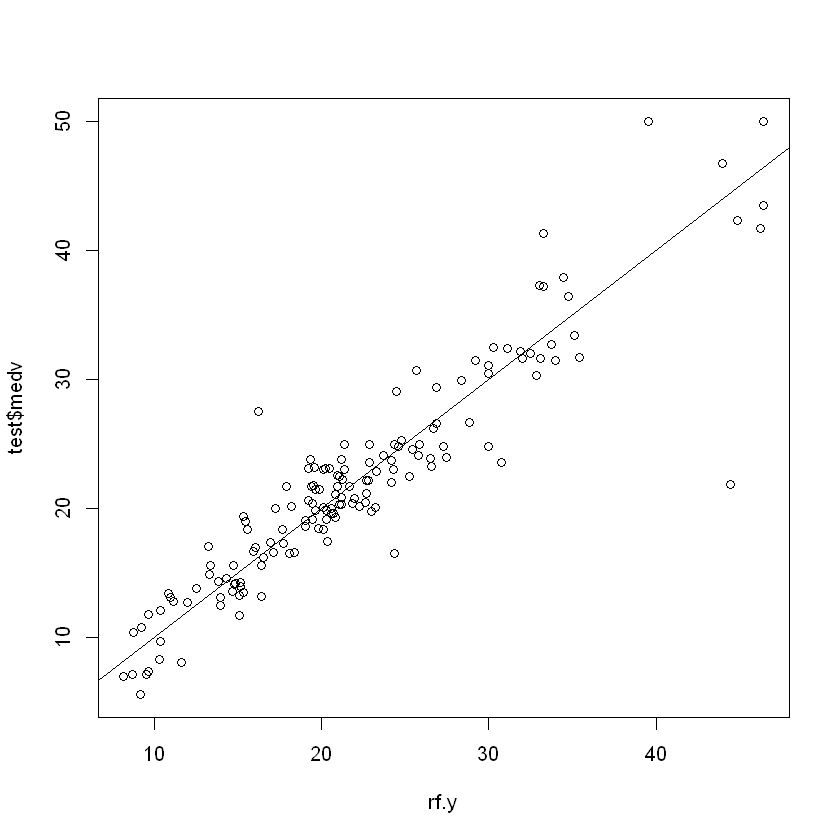

In [27]:
rf.y = predict(rf.Boston, newdata = test)
plot(rf.y, test$medv)
abline(0,1)

#Test MSE:
cat("Test MSE:" ,mean((rf.y-test$medv)^2))

#### Now, I will use only 6 variables, "Feature Bagging", to build each tree.

In [35]:
rf.bagging.Boston = randomForest(medv~., data = Boston, subset = train.index,
                                 mtry=6, importance = T)
rf.y = predict(rf.bagging.Boston, newdata = test)
print(paste0("Test MSE: " ,mean((rf.y-test$medv)^2)))
print("We got a MSE which is a bit smaller")

[1] "Test MSE: 9.79413446036241"
[1] "We got a MSE which is a bit smaller"


## Variable importance

Calling "importance()" shows the importance of each variable, calculated by permuting the Out-of-bag examples - for every tree, there are examples which were not used to create it. This sample is used to calculate the importance measure.
The prediction accuracy is calculated from those OOB examples.
Then, one variable on the OOB examples is randomly shuffled, effectivly removing its predictive power, while keeping other variables fixed. 
Then, the difference between the accuracies is measured.

This is averaged on all the trees and variables, and normalized by the std.


,%IncMSE,IncNodePurity
crim,15.568419,1672.67672
zn,2.389154,99.86424
indus,10.261993,1573.10496
chas,3.537602,167.78971
nox,16.118009,1534.60671
rm,39.556305,10959.44630
age,12.768607,761.84978
dis,14.837758,1476.95458
rad,5.123607,223.31037
tax,11.949692,585.83739


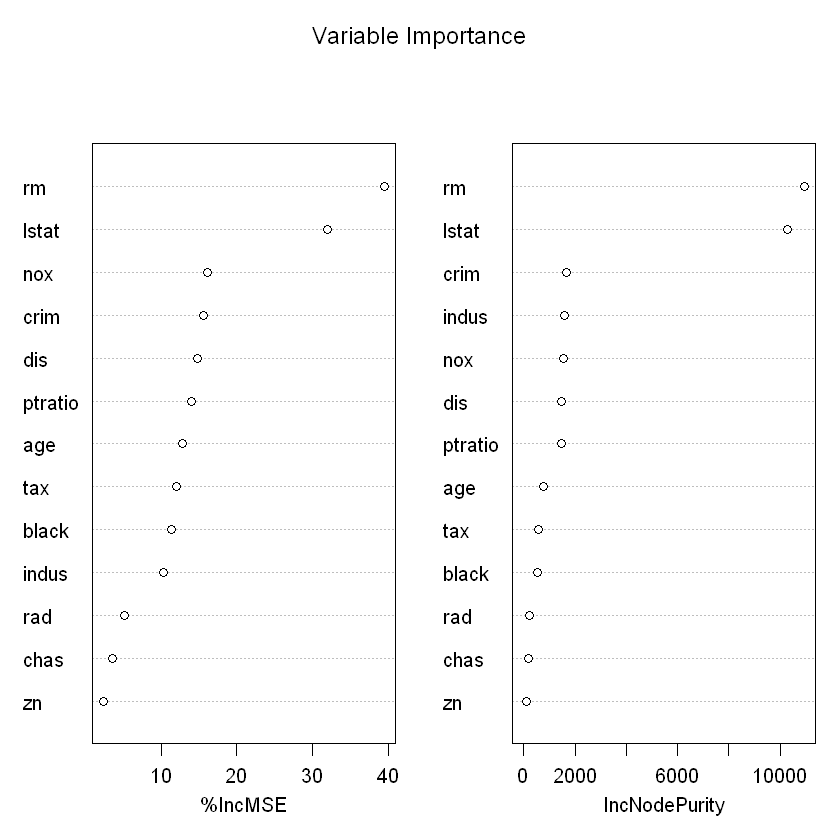

In [43]:
importance(rf.bagging.Boston)
varImpPlot(rf.bagging.Boston, main = "Variable Importance") 